In [161]:
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from dframcy import DframCy
from spacy.pipeline import EntityRuler

In [162]:
##If you are missing any package in the previous cell install them now!
#!pip install networkx dframcy spacy

In [163]:
#Download a language model. For accuracy, we dowload an English large model. We could download a even more powerfull
#transformer model but we will need a GPU

!python -m spacy download en_core_web_lg

In [164]:
nlp = spacy.load('en_core_web_lg')

In [165]:
# We load the text:

with open('alice-2.txt') as stream:
    text = stream.read()

In [166]:
# We process the text

doc = nlp(text)

In [167]:
#We take a look at the content of the doc object, using the package DframCy which convert an spaCy doc object to
# Pandas dataframe:
dframcy = DframCy(nlp)
#print(doc[0:10])
doc2 = dframcy.nlp(text)
annotation_dataframe = dframcy.to_dataframe(doc2)

In [168]:
annotation_dataframe.head()

,token_text,token_start,token_end,token_pos_,token_tag_,token_dep_,token_head,token_ent_type_
0,Alice,0,5,PROPN,NNP,nsubj,beginning,PERSON
1,was,6,9,AUX,VBD,aux,beginning,
2,beginning,10,19,VERB,VBG,ccomp,thought,
3,to,20,22,PART,TO,aux,get,
4,get,23,26,VERB,VB,xcomp,beginning,


In [169]:
#We crate here pair of entities to obtain pair of nodes that can in turn be used for network modeling.
# Initialize an empty list to store the named entities
named_entities = []

# Iterate through the sentences
for sentence in doc.sents:
    # Extract the named entities in the sentence
    entities = [ent.text for ent in sentence.ents]
    # Add the named entities to the list
    if len(entities) > 2: 
        named_entities.append(entities)




In [170]:
print(named_entities[0:10])

[['three', 'Alice', 'first', 'one'], ['First', 'a few minutes', 'Alice'], ['Curiouser', 'Alice', 'English'], ['Alice', 'Right Foot', 'Hearthrug', 'Alice'], ['four', 'five', 'twelve', 'four', 'six', 'thirteen', 'four', 'seven'], ['London', 'Paris', 'Paris', 'Rome', 'Rome'], ['Alice', 'Mabel', 'poky little house'], ['English', 'Alice', 'French', 'William the Conqueror'], ['first', 'a few minutes', 'Alice'], ['Lory', 'Alice', 'Lory']]


In [171]:
named_entities_pairs = []

# Iterate through the sentences
for sentence in doc.sents:
    # Extract the named entities in the sentence
    entities = [ent.text for ent in sentence.ents]
    # Create pairs of named entities using itertools.combinations
    pairs = list(itertools.combinations(entities, 2))
    # Add the named entities pairs to the list
    named_entities_pairs.extend(pairs)

print(named_entities_pairs)

[('Alice', 'Alice'), ('four thousand miles', 'Alice'), ('New Zealand', 'Australia'), ('Alice', 'one'), ('three', 'Alice'), ('three', 'first'), ('three', 'one'), ('Alice', 'first'), ('Alice', 'one'), ('first', 'one'), ('second', 'about fifteen inches'), ('half', 'Alice'), ('First', 'a few minutes'), ('First', 'Alice'), ('a few minutes', 'Alice'), ('Alice', 'this minute'), ('Alice', 'two'), ('Curiouser', 'Alice'), ('Curiouser', 'English'), ('Alice', 'English'), ('Alice', 'Right Foot'), ('Alice', 'Hearthrug'), ('Alice', 'Alice'), ('Right Foot', 'Hearthrug'), ('Right Foot', 'Alice'), ('Hearthrug', 'Alice'), ('one', 'one'), ('about four inches', 'half'), ('Duchess', 'Duchess'), ('Ada', 'Mabel'), ('four', 'five'), ('four', 'twelve'), ('four', 'four'), ('four', 'six'), ('four', 'thirteen'), ('four', 'four'), ('four', 'seven'), ('five', 'twelve'), ('five', 'four'), ('five', 'six'), ('five', 'thirteen'), ('five', 'four'), ('five', 'seven'), ('twelve', 'four'), ('twelve', 'six'), ('twelve', 'thi

In [172]:
#We can filter put short senteces that may not contain any context. 
sentences = list(doc.sents)
long_sentences = [sentence for sentence in sentences if len(sentence) > 10]
long_sentences[0:5]

[Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, "and what is the use of a book,” thought Alice "without pictures or conversations?”,
 So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.,
 There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, "Oh dear!,
 (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at it, and then hurried on, Alice

In [173]:


# ... previous code to process the text ...

# Initialize an empty list to store the named entities pairs
named_entities_pairs = []

# Iterate through the sentences
for sentence in doc.sents:
    # Extract the named entities in the sentence
    entities = [ent.text for ent in sentence.ents if ent.label_ == "PERSON"]
    # Create pairs of named entities using itertools.combinations
    pairs = list(itertools.combinations(entities, 2))
    pairs = [pair for pair in pairs if pair[0] != pair[1]]
    # Add the named entities pairs to the list
    named_entities_pairs.extend(pairs)

print(named_entities_pairs)



[('Curiouser', 'Alice'), ('Ada', 'Mabel'), ('Alice', 'Mabel'), ('Alice', 'William the Conqueror'), ('Alice', 'Mouse'), ('Mouse', 'Alice'), ('Ahem', 'Mouse'), ('Edwin', 'Stigand'), ('Edwin', 'Canterbury'), ('Stigand', 'Canterbury'), ('Edgar Atheling', 'William'), ('Mouse', 'Alice'), ('Alice', 'Mouse'), ('Mouse', 'Fury'), ('Said', 'Fury'), ('Mouse', 'Alice'), ('Alice', 'Mary Ann'), ('ladder?—Why', 'Bill'), ('ladder?—Why', 'Bill'), ('Bill', 'chimney?—Nay'), ('Bill', 'Alice'), ('Bill', 'Alice'), ('Alice', 'shyly'), ('Alice', 'William'), ('Alice', 'Cheshire'), ('Hatter', 'Dormouse'), ('Hatter', 'Alice'), ('Dormouse', 'Hatter'), ('Hatter', 'Alice'), ('Hatter', 'Queen'), ('Elsie', 'Lacie'), ('Elsie', 'Tillie'), ('Elsie', 'Alice'), ('Lacie', 'Tillie'), ('Lacie', 'Alice'), ('Tillie', 'Alice'), ('Alice', 'Hatter'), ('Dormouse', 'Alice'), ('Dormouse', 'Alice'), ('Hatter', 'Alice'), ('Alice', 'Dormouse'), ('Alice', 'Dormouse'), ('Dormouse', 'Alice'), ('Alice', 'Hatter'), ('Alice', 'Dormouse'), ('a

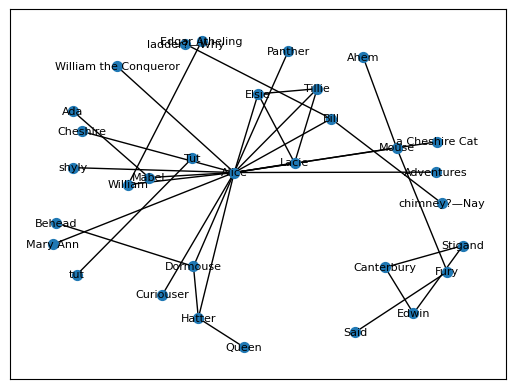

In [174]:

# create the graph
G = nx.Graph()
G.add_edges_from(named_entities_pairs)

# set the node size and spacing
node_size = 50
k = 1
font_size = 8

# compute the layout of the graph
pos = nx.spring_layout(G, k=k)

# draw the graph
nx.draw_networkx(G, pos=pos, node_size=node_size, font_size=font_size, with_labels=True)

# display the graph
plt.show()

In [175]:
#displacy.render(doc, style="ent")

In [176]:
ruler = nlp.add_pipe("entity_ruler", before='ner')
#nlp.remove_pipe("entity_ruler")


In [177]:
patterns = [
    {"label": "PERSON", "pattern": "Duchess"}
]

ruler.add_patterns(patterns)

In [178]:
doc2 = nlp("Alice saw the Duchess and the Lory")

In [179]:
displacy.render(doc2, style='ent')

In [180]:
#displacy.render(doc, style='ent')